In [109]:
import csv
import numpy as np
from numpy.random import RandomState
from sklearn.model_selection import train_test_split

import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

import keras
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.models import Sequential
import itertools
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation

def load_data(inp):
    data = []

    # Read the training data
    f = open(inp)
    reader = csv.reader(f)
    next(reader, None)
    for row in reader:
        data.append(row)
    f.close()

    X = np.array([x[:-1] for x in data]).astype(np.float)
    y = np.array([x[-1] for x in data]).astype(np.float)
    del data # free up the memory
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RandomState(), stratify = y)
    
    #normalizing
    x_train_mean = np.mean(x_train)
    x_train_std  = np.std(x_train)

    x_test_mean = np.mean(x_test)
    x_test_std = np.std(x_test)

    x_train = (x_train - x_train_mean) / x_train_std
    x_test  = (x_test - x_test_mean) / x_test_std 

    x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = RandomState(), stratify = y_train)
    
    return x_train, x_validate, y_train, y_validate, x_test, y_test


x_train, x_validate, y_train, y_validate, x_test, y_test = load_data('spambase.data')

In [114]:
print(x_train)
print(y_train)

[[-6.90213404e-02 -6.90213404e-02 -5.70189287e-02 ...  8.53593955e-01
   3.24005480e+00  3.62143984e+00]
 [-6.90213404e-02 -6.90213404e-02 -6.63292107e-02 ... -4.95033998e-02
   4.69404607e-01  1.51260488e+00]
 [-6.73387594e-02 -6.66657269e-02 -6.25153602e-02 ... -1.48534467e-02
   1.23217470e+00  1.77551210e+01]
 ...
 [-6.90213404e-02 -6.90213404e-02 -5.12981530e-02 ... -5.23974393e-02
   9.49911026e-03  4.13318571e-01]
 [-6.90213404e-02 -6.90213404e-02 -6.90213404e-02 ... -5.01203462e-02
   9.49911026e-03  2.21928894e+00]
 [-6.90213404e-02 -6.90213404e-02 -6.90213404e-02 ... -4.68000529e-02
   6.55851465e-02  1.10878542e+00]]
[1. 1. 1. ... 0. 0. 0.]


In [110]:
model = Sequential()
model.add(Dense(256,input_dim = 57, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 256)               14848     
_________________________________________________________________
dense_34 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_35 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 65        
Total params: 56,065
Trainable params: 56,065
Non-trainable params: 0
_________________________________________________________________


In [111]:
model.compile(loss='binary_crossentropy',
              optimizer= RMSprop(learning_rate = 0.0001),
              metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="weights.finalmodel", verbose=0, save_best_only=True)
callbacks_list = [checkpointer]

In [112]:
history = model.fit(x_train, y_train,
          epochs=200,
          batch_size = 5,
          validation_data = (x_validate, y_validate),
          callbacks=callbacks_list,
          verbose = 1)

Train on 2576 samples, validate on 644 samples
Epoch 1/200
2576/2576 [==============================] - 1s 236us/step - loss: 0.6030 - accuracy: 0.6968 - val_loss: 0.5498 - val_accuracy: 0.7143
Epoch 2/200
2576/2576 [==============================] - 0s 189us/step - loss: 0.5408 - accuracy: 0.7267 - val_loss: 0.5227 - val_accuracy: 0.7345
Epoch 3/200
2576/2576 [==============================] - 1s 194us/step - loss: 0.5312 - accuracy: 0.7252 - val_loss: 0.5146 - val_accuracy: 0.7345
Epoch 4/200
2576/2576 [==============================] - 0s 186us/step - loss: 0.5247 - accuracy: 0.7360 - val_loss: 0.5107 - val_accuracy: 0.7283
Epoch 5/200
2576/2576 [==============================] - 0s 183us/step - loss: 0.5146 - accuracy: 0.7422 - val_loss: 0.5044 - val_accuracy: 0.7376
Epoch 6/200
2576/2576 [==============================] - 0s 189us/step - loss: 0.5114 - accuracy: 0.7438 - val_loss: 0.4939 - val_accuracy: 0.7531
Epoch 7/200
2576/2576 [==============================] - 0s 178us/step 

2576/2576 [==============================] - 0s 180us/step - loss: 0.2658 - accuracy: 0.8964 - val_loss: 0.3536 - val_accuracy: 0.8913
Epoch 57/200
2576/2576 [==============================] - 0s 175us/step - loss: 0.2671 - accuracy: 0.9045 - val_loss: 0.4083 - val_accuracy: 0.8727
Epoch 58/200
2576/2576 [==============================] - 0s 178us/step - loss: 0.2616 - accuracy: 0.9041 - val_loss: 0.5102 - val_accuracy: 0.8339
Epoch 59/200
2576/2576 [==============================] - 0s 177us/step - loss: 0.2626 - accuracy: 0.9010 - val_loss: 0.2785 - val_accuracy: 0.9006
Epoch 60/200
2576/2576 [==============================] - 0s 181us/step - loss: 0.2535 - accuracy: 0.9010 - val_loss: 0.3055 - val_accuracy: 0.8882
Epoch 61/200
2576/2576 [==============================] - 0s 176us/step - loss: 0.2612 - accuracy: 0.9095 - val_loss: 0.2629 - val_accuracy: 0.9084
Epoch 62/200
2576/2576 [==============================] - 0s 178us/step - loss: 0.2500 - accuracy: 0.9049 - val_loss: 0.2857 

2576/2576 [==============================] - 0s 180us/step - loss: 0.2183 - accuracy: 0.9297 - val_loss: 0.2479 - val_accuracy: 0.9193
Epoch 112/200
2576/2576 [==============================] - 0s 180us/step - loss: 0.2261 - accuracy: 0.9274 - val_loss: 0.2357 - val_accuracy: 0.9224
Epoch 113/200
2576/2576 [==============================] - 0s 181us/step - loss: 0.2136 - accuracy: 0.9231 - val_loss: 0.3559 - val_accuracy: 0.8711
Epoch 114/200
2576/2576 [==============================] - 0s 180us/step - loss: 0.2222 - accuracy: 0.9243 - val_loss: 0.2357 - val_accuracy: 0.9146
Epoch 115/200
2576/2576 [==============================] - 0s 178us/step - loss: 0.2256 - accuracy: 0.9216 - val_loss: 0.2951 - val_accuracy: 0.9006
Epoch 116/200
2576/2576 [==============================] - 0s 180us/step - loss: 0.2162 - accuracy: 0.9235 - val_loss: 0.2423 - val_accuracy: 0.9208
Epoch 117/200
2576/2576 [==============================] - 0s 181us/step - loss: 0.2144 - accuracy: 0.9278 - val_loss: 0

2576/2576 [==============================] - 0s 185us/step - loss: 0.2020 - accuracy: 0.9305 - val_loss: 0.3667 - val_accuracy: 0.8944
Epoch 167/200
2576/2576 [==============================] - 0s 177us/step - loss: 0.2097 - accuracy: 0.9313 - val_loss: 0.2512 - val_accuracy: 0.9084
Epoch 168/200
2576/2576 [==============================] - 0s 175us/step - loss: 0.2161 - accuracy: 0.9313 - val_loss: 0.2303 - val_accuracy: 0.9286
Epoch 169/200
2576/2576 [==============================] - 0s 179us/step - loss: 0.2099 - accuracy: 0.9309 - val_loss: 0.2647 - val_accuracy: 0.9208
Epoch 170/200
2576/2576 [==============================] - 0s 179us/step - loss: 0.2012 - accuracy: 0.9293 - val_loss: 0.2738 - val_accuracy: 0.9115
Epoch 171/200
2576/2576 [==============================] - 0s 187us/step - loss: 0.2170 - accuracy: 0.9348 - val_loss: 0.2713 - val_accuracy: 0.9099
Epoch 172/200
2576/2576 [==============================] - 0s 181us/step - loss: 0.2130 - accuracy: 0.9309 - val_loss: 0

In [105]:
score = model.evaluate(x_test, y_test)

loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model.save("model_optimizer_RMSprop.model")

644/644 [==============================] - 0s 17us/step
Validation: accuracy = 0.923913  ;  loss_v = 0.225154
Test: accuracy = 0.928261  ;  loss = 0.227976


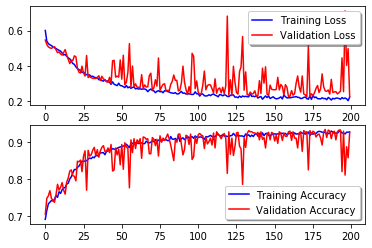

In [106]:
fig, axs = plt.subplots(2,1)
axs[0].plot(history.history['loss'], color = 'b', label = "Training Loss")
axs[0].plot(history.history['val_loss'], color = 'r', label = "Validation Loss", axes = axs[0])
legend = axs[0].legend(loc='best', shadow = True)

axs[1].plot(history.history['accuracy'], color = 'b', label = "Training Accuracy")
axs[1].plot(history.history['val_accuracy'], color = 'r', label = "Validation Accuracy")
legend = axs[1].legend(loc='best', shadow = True)

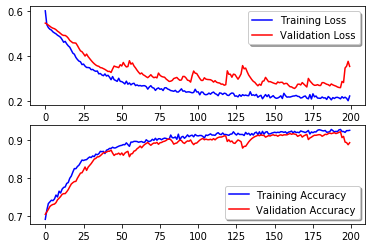

In [108]:
def smooth_curve(points, factor = 0.85):
    smooth_points = []
    for point in points:
        if smooth_points:
            previous = smooth_points[-1]
            smooth_points.append(previous * factor + point * (1 - factor))
        else:
            smooth_points.append(point)
    return smooth_points

smooth_val_loss = smooth_curve(history.history['val_loss'])
smooth_val_accuracy = smooth_curve(history.history['val_accuracy'])

fig, axs = plt.subplots(2,1)
axs[0].plot(history.history['loss'], color = 'b', label = "Training Loss")
axs[0].plot(smooth_val_loss, color = 'r', label = "Validation Loss", axes = axs[0])
legend = axs[0].legend(loc='best', shadow = True)

axs[1].plot(history.history['accuracy'], color = 'b', label = "Training Accuracy")
axs[1].plot(smooth_val_accuracy, color = 'r', label = "Validation Accuracy")
legend = axs[1].legend(loc='best', shadow = True)